
<center> <h1>Universidad Nacional de San Agustín de Arequipa</h1> </center>
<center> <h1>Escuela Profesional de Ingeniería de Telecomunicaciones</h1> </center>

<center> <h1> </h1> </center>

<center><img src="https://user-images.githubusercontent.com/19308295/115939517-f1c6fe80-a463-11eb-989c-812ab4942586.png" width="380" height="400"></center>

<center> <h1>Curso : Computación 2</h1> </center>

<center> <h2>EXPOSICION FINAL TRABAJO GRUPAL </h2> </center>


<center> <h1>INTEGRANTES</h1> </center>

> Arana Puma Pedro Jesus

> Apaza Quispe Ivan Francisco

> Bolivar Huamani Fernando Kevin

> Calatayu Huamani Leonardo Carlo

> Pari Acuña Luis Eduardo


**texto en negrita**<table width='99%'>
<tr>
<td bgcolor='#52008E'>

# **<font color="#FFFFFF"> ◉  Árboles de Decisión para Clasificación</font>**

</td>
</tr>
</table>

<table width='99%'>
<tr>
<td bgcolor='#FFC901'>

## **<font color="#000000"> ◉ Importar librerías</font>**

</td>
</tr>
</table>

In [ ]:
import numpy as np
import pandas as pd

<table width='99%'>
<tr>
<td bgcolor='#FFC901'>

## **<font color="#000000"> ◉ Importacion de la Base de Datos 'Datos.csv'</font>**

</td>
</tr>
</table>

Para nuestro proyecto nosotros optamos por una data sobre el tamaño de teclados de computadora y el tamaño de sus teclas, esta data se encuentra disponible en la librería Kaggle

https://www.kaggle.com/datasets/pedrojesusaranapuma/base-de-datos-tamaos-de-teclados-y-sus-teclas?resource=download

Los datos esta almacenados en archivo `Datos.csv` que se encuentra en el directorio `data`
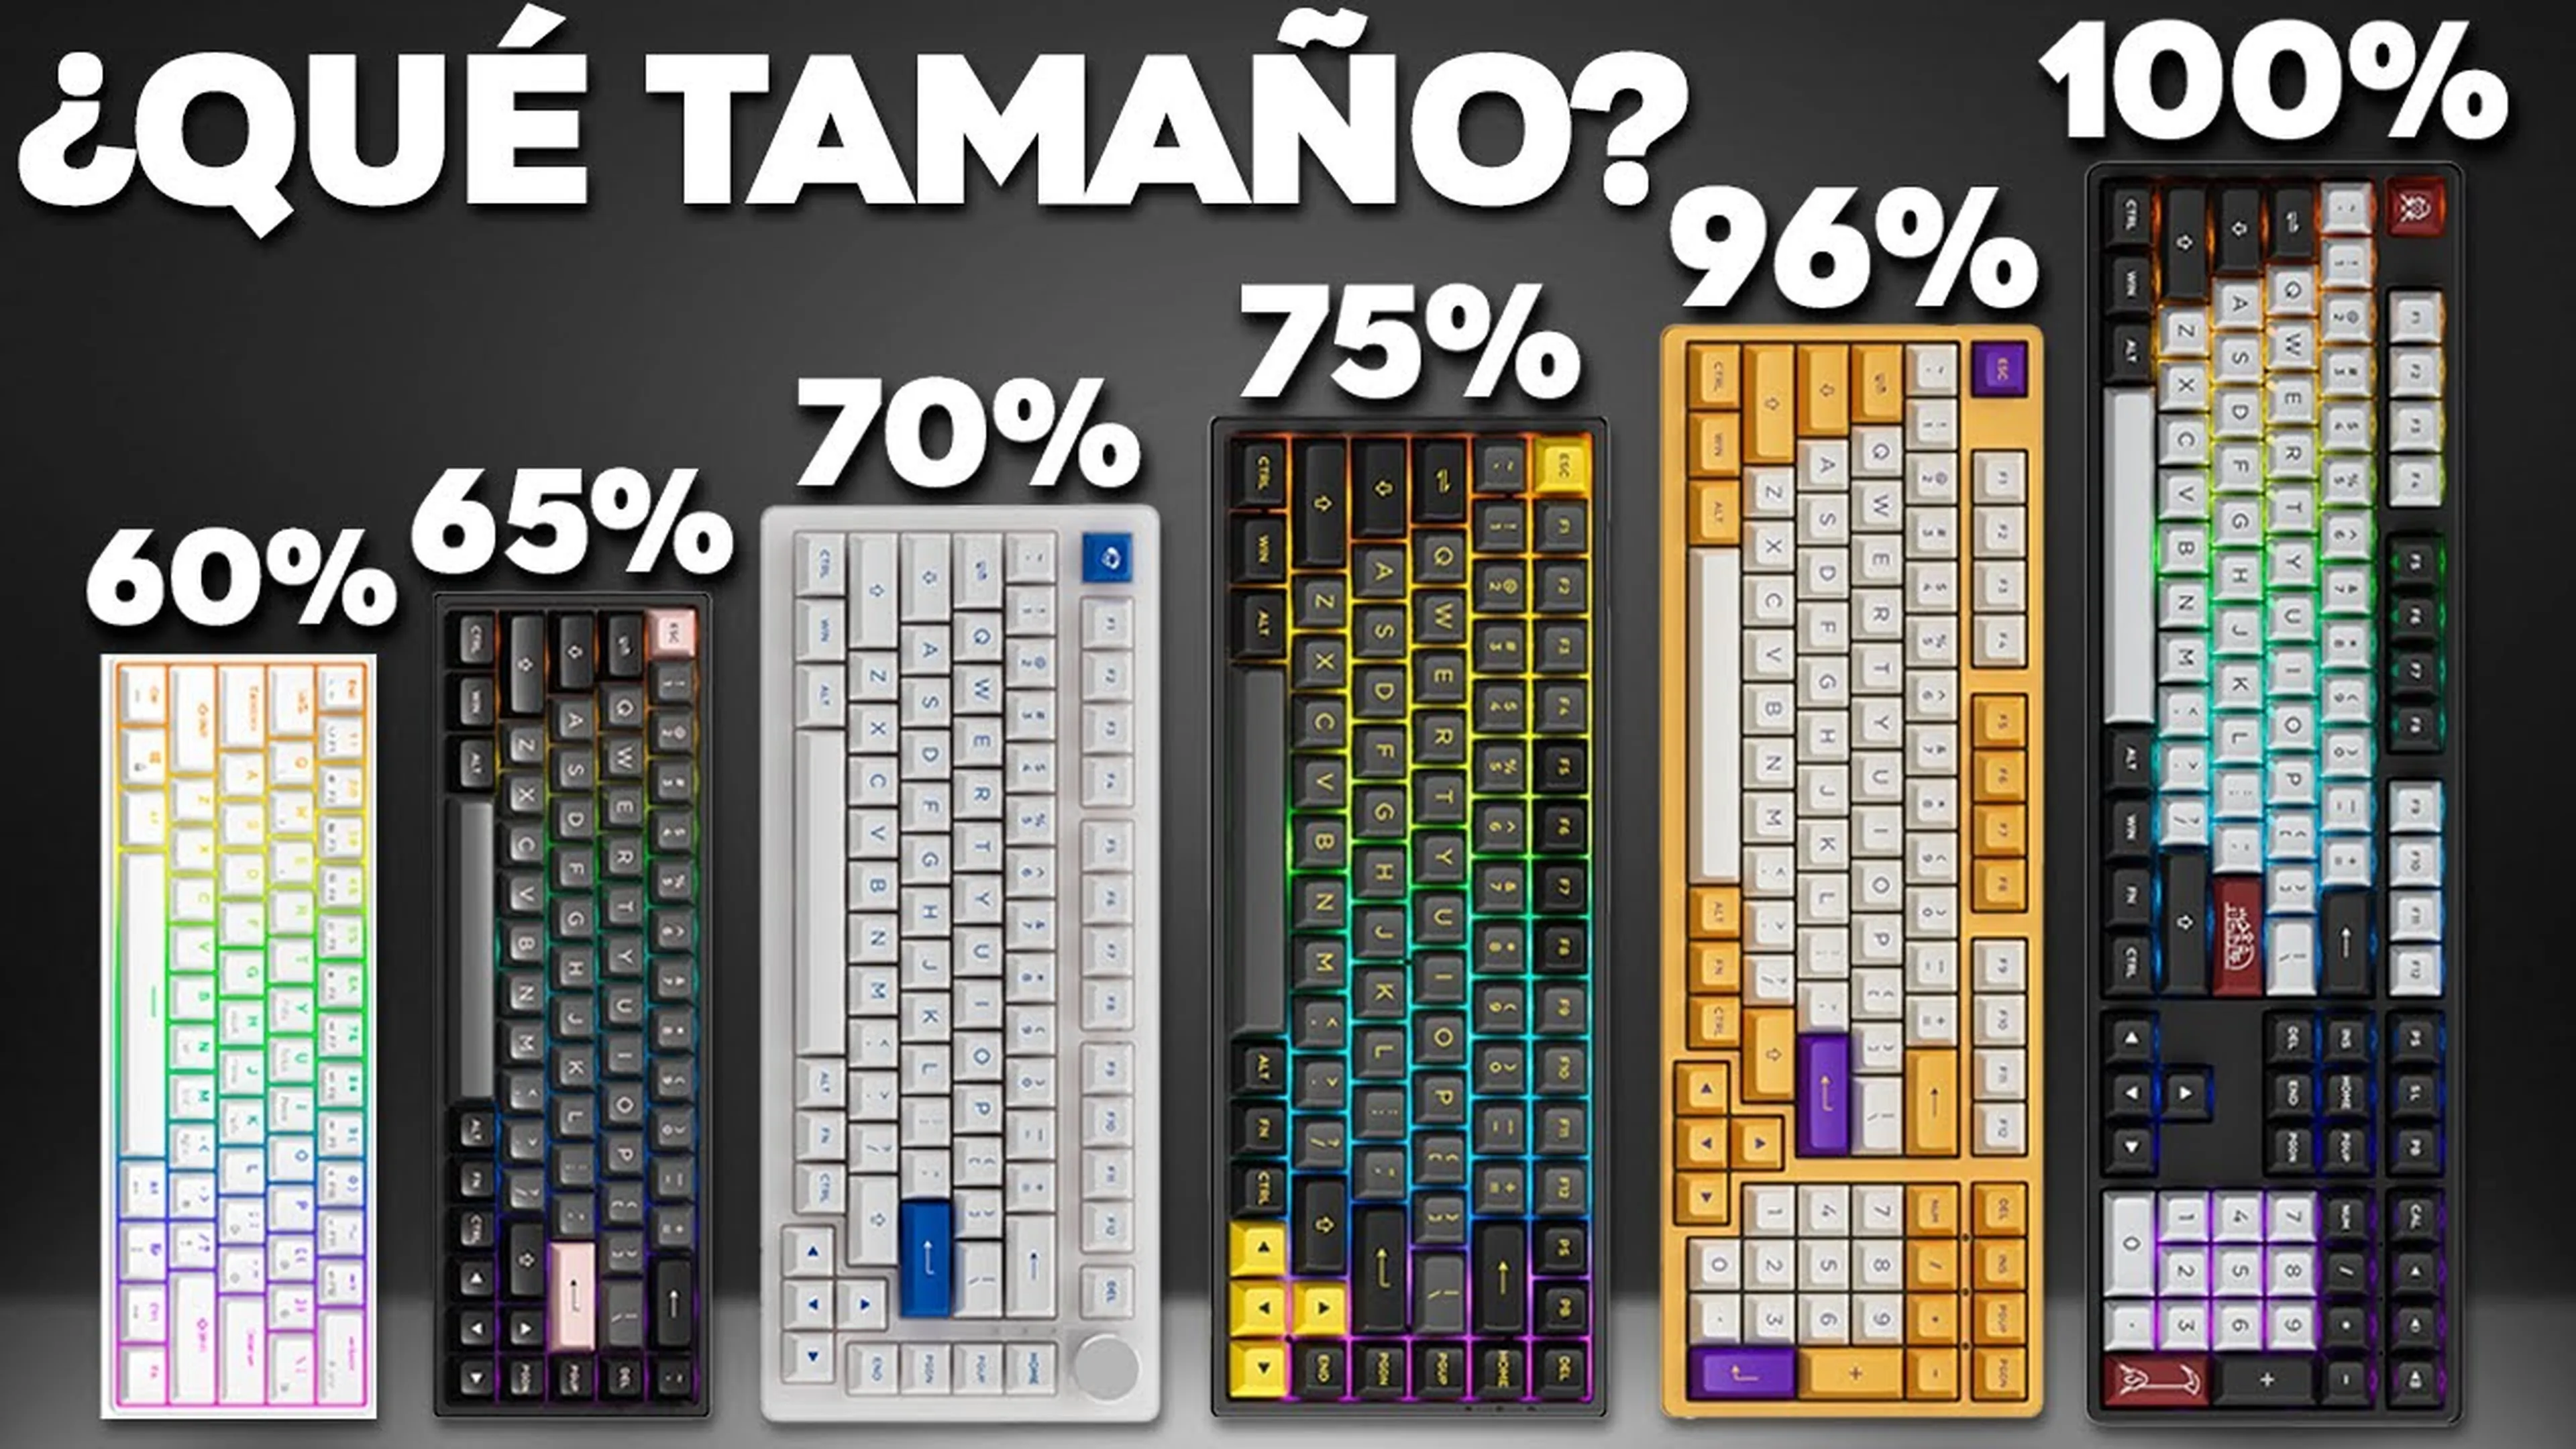

<img src="https://ivanchavez.me/wp-content/uploads/2022/08/1_bQYZ7fp_wcjWFwpBbcRS-Q.png" width="400" height="200" />

In [ ]:
#Importamos los datos de la misma librería de scikit-learn
dataset = pd.read_csv('/home/leonardo/Documentos/data/Datos.csv',
                      names= ['keyboard length (cm)','keyboard width (cm)', ' keyboard key length (cm)',
                      'keyboard key width (cm)','Etiqueta'])

"\ndataset = pd.read_csv('/home/leonardo/Documentos/data/Datos.csv',\n                      names= ['keyboard length (cm)','keyboard width (cm)', ' keyboard key length (cm)',\n                      'keyboard key width (cm)','Etiqueta'])\n"

In [ ]:
#Las 5 primeras columnas
dataset.head()

,keyboard length (cm),keyboard width (cm),keyboard key length (cm),keyboard key width (cm),Etiqueta
0,18.5,44.0,1.6,1.7,0
1,19.9,46.8,1.5,1.5,0
2,18.1,43.4,1.7,1.7,0
3,19.7,47.4,1.5,1.7,0
4,17.1,43.8,1.5,1.5,0


In [ ]:
#Las 5 ultimas columnas
dataset.tail()

,keyboard length (cm),keyboard width (cm),keyboard key length (cm),keyboard key width (cm),Etiqueta
145,11.7,39.7,1.7,2.8,2
146,11.5,35.2,1.6,2.3,2
147,11.7,38.2,1.7,4.1,2
148,10.5,37.9,1.5,3.4,2
149,11.1,38.9,1.7,2.7,2


`ceros=Teclado Estandar , unos=Teclado Compacto y dos=Teclado Mini`

<table width='99%'>
<tr>
<td bgcolor='#FFC901'>

## **<font color="#000000"> ◉ Exploración de datos</font>**

</td>
</tr>
</table>

In [ ]:
#Informacion de la data importada
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   keyboard length (cm)       150 non-null    float64
 1   keyboard width (cm)        150 non-null    float64
 2    keyboard key length (cm)  150 non-null    float64
 3   keyboard key width (cm)    150 non-null    float64
 4   Etiqueta                   150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
#Tipo de los datos
dataset.dtypes

,0
keyboard length (cm),float64
keyboard width (cm),float64
keyboard key length (cm),float64
keyboard key width (cm),float64
Etiqueta,int64


In [ ]:
#Dimensiones de las columnas
dataset.shape

(150, 5)

In [ ]:
#Verifico la cantidad de datos que hay en los dataset
print('Cantidad de datos')
dataset.count()

Cantidad de datos


,0
keyboard length (cm),150
keyboard width (cm),150
keyboard key length (cm),150
keyboard key width (cm),150
Etiqueta,150


In [ ]:
#Verifico los valores nulos
dataset.isnull().sum()

,0
keyboard length (cm),0
keyboard width (cm),0
keyboard key length (cm),0
keyboard key width (cm),0
Etiqueta,0


In [ ]:
#Nombres de columnas
dataset.columns

Index(['keyboard length (cm)', 'keyboard width (cm)',
       ' keyboard key length (cm)', 'keyboard key width (cm)', 'Etiqueta'],
      dtype='object')

In [ ]:
#Obtener valores estadisticos de la data importada
dataset.describe()

,keyboard length (cm),keyboard width (cm),keyboard key length (cm),keyboard key width (cm),Etiqueta
count,150.000000,150.0000,150.000000,150.000000,150.000000
mean,14.973333,42.0420,1.596667,2.023333,1.000000
std,2.536516,3.5871,0.118953,0.724028,0.819232
min,10.100000,35.2000,1.400000,1.400000,0.000000
25%,13.225000,38.9000,1.500000,1.600000,0.000000
50%,15.200000,43.2000,1.600000,1.700000,1.000000
75%,16.875000,44.7750,1.700000,2.175000,2.000000
max,19.900000,47.9000,1.800000,4.100000,2.000000


<table width='99%'>
<tr>
<td bgcolor='#FFC901'>

## **<font color="#000000"> ◉ Preparación de los datos para Árboles de Decisión Clasificcación </font>**

</td>
</tr>
</table>

In [ ]:
dataset.head()

,keyboard length (cm),keyboard width (cm),keyboard key length (cm),keyboard key width (cm),Etiqueta
0,18.5,44.0,1.6,1.7,0
1,19.9,46.8,1.5,1.5,0
2,18.1,43.4,1.7,1.7,0
3,19.7,47.4,1.5,1.7,0
4,17.1,43.8,1.5,1.5,0


In [ ]:
#Seleccionamos todas las columnas de carasteristicas
X = dataset[dataset.columns[:-1]].to_numpy()

In [ ]:
print(X)

[[18.5 44.   1.6  1.7]
 [19.9 46.8  1.5  1.5]
 [18.1 43.4  1.7  1.7]
 [19.7 47.4  1.5  1.7]
 [17.1 43.8  1.5  1.5]
 [18.9 45.   1.4  1.5]
 [19.  47.6  1.5  1.5]
 [17.  43.3  1.7  1.8]
 [16.8 47.9  1.6  1.8]
 [16.7 45.9  1.6  1.4]
 [15.7 46.   1.6  1.6]
 [19.2 43.1  1.7  1.6]
 [17.6 44.2  1.7  1.8]
 [16.9 44.7  1.8  1.6]
 [17.3 45.   1.6  1.5]
 [18.5 47.7  1.5  1.8]
 [15.5 46.1  1.8  1.4]
 [15.6 45.   1.6  1.4]
 [16.6 45.5  1.8  1.7]
 [15.2 45.7  1.5  1.5]
 [16.8 45.3  1.7  1.4]
 [15.8 45.5  1.5  1.5]
 [19.  43.8  1.7  1.4]
 [17.6 43.7  1.5  1.5]
 [19.8 43.5  1.6  1.5]
 [17.5 43.8  1.7  1.7]
 [18.5 45.7  1.4  1.7]
 [17.3 45.1  1.5  1.6]
 [18.5 44.9  1.7  1.8]
 [15.4 46.2  1.6  1.7]
 [17.1 46.5  1.5  1.5]
 [18.5 46.1  1.8  1.8]
 [17.3 46.4  1.6  1.7]
 [15.2 43.3  1.7  1.7]
 [15.6 45.6  1.5  1.5]
 [15.4 44.5  1.6  1.6]
 [19.2 46.6  1.8  1.6]
 [15.8 46.7  1.5  1.8]
 [19.5 46.5  1.7  1.6]
 [15.7 45.8  1.5  1.7]
 [17.7 45.3  1.4  1.6]
 [18.2 43.8  1.7  1.6]
 [17.8 46.4  1.7  1.5]
 [19.1 47.1

In [ ]:
#Defino los datos correspondientes a las etiquetas
Y =  dataset[dataset.columns[-1]].to_numpy()

In [ ]:
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


<table width='99%'>
<tr>
<td bgcolor='#FFC901'>

## **<font color="#000000"> ◉ Implementación de Árboles de Decision Clasificación</font>**

</td>
</tr>
</table>

In [ ]:
#Importamos librerias
from sklearn.model_selection import train_test_split

In [ ]:
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.18)

In [ ]:
#Arboles de decisión
from sklearn.tree import DecisionTreeClassifier
algoritmo = DecisionTreeClassifier(criterion='entropy')


In [ ]:
#Entreno el modelo
algoritmo.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

<table width='99%'>
<tr>
<td bgcolor='#FFC901'>

## **<font color="#000000"> ◉ Verificacion del modelo desarrollo</font>**

</td>
</tr>
</table>

In [ ]:
#Ver la precision obtenida de prueba
precision = algoritmo.score(X_test,Y_test)
print('Precision del modelo Datos Pruebas')
print(precision)

Precision del modelo Datos Pruebas
0.8888888888888888


In [ ]:
#Ver la precision obtenida de entrenamiento
precision2 = algoritmo.score(X_train,Y_train)
print('Precision del modelo Datos Entremiento')
print(precision2)

Precision del modelo Datos Entremiento
1.0


<table width='99%'>
<tr>
<td bgcolor='#FFC901'>

## **<font color="#000000"> ◉ Gráficamos nuestro arbol</font>**

</td>
</tr>
</table>

Importamos Librerias para graficar

instalar `conda install -c anaconda graphviz`

instalar `conda install -c conda-forge python-graphviz`

In [ ]:
#Esto es para linux
#!conda install -c anaconda graphviz -y

Channels:
 - anaconda
 - defaults
 - conda-forge
Platform: linux-64
\ 

In [ ]:
#Esto es para linux
#!conda install -c conda-forge python-graphviz -y

Channels:
 - conda-forge
 - defaults
 - anaconda
Platform: linux-64
/ 

In [ ]:
#Importamos librerias
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt

In [ ]:
#Creamos un archivo .dot que contiene a la grafica
export_graphviz(algoritmo,out_file='arbol.dot',class_names=('estandar', 'compacto', 'teclado mini','ergonomico'),
                feature_names = ('keyboard length (cm)', 'keyboard width (cm)', 'keyboard key length (cm)', 'keyboard key width (cm)'),
                impurity=False,filled = True)

Creamos la gráfica

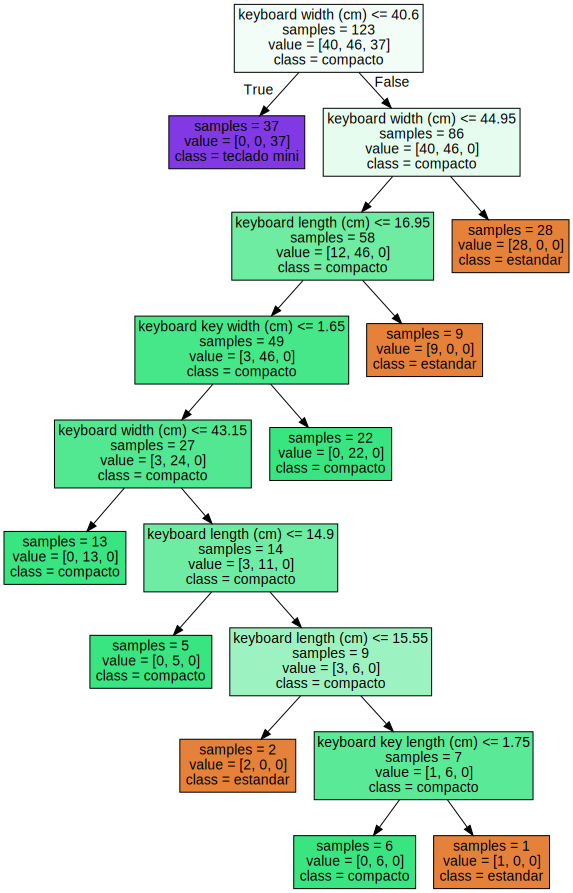

In [ ]:
with open('arbol.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

<function matplotlib.pyplot.show(close=None, block=None)>

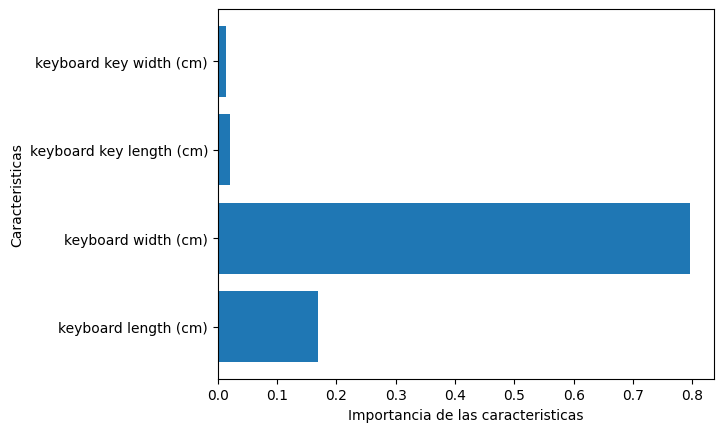

In [ ]:
caract=X.shape[1]
plt.barh(range(caract),algoritmo.feature_importances_)
plt.yticks(np.arange(caract),('keyboard length (cm)', 'keyboard width (cm)', 'keyboard key length (cm)', 'keyboard key width (cm)'))
plt.xlabel('Importancia de las caracteristicas')
plt.ylabel('Caracteristicas')
plt.show

<table width='99%'>
<tr>
<td bgcolor='#FFC901'>

## **<font color="#000000"> ◉ Volvemos a entrenar el modelo con 3 niveles evitando sobreajuste</font>**

</td>
</tr>
</table>

In [ ]:
#Arboles de decisión
algoritmo = DecisionTreeClassifier(max_depth=3)

In [ ]:
#Entreno el modelo
algoritmo.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
#Ver la precision obtenida de prueba
precision = algoritmo.score(X_test,Y_test)
print('Precision del modelo Datos Prueba:')
print(precision)

Precision del modelo Datos Prueba:
0.9259259259259259


In [ ]:
#Ver la precision obtenida de entrenamiento
precision2 = algoritmo.score(X_train,Y_train)
print('Precisión del modelo Datos Entrenamiento:')
print(precision2)

Precisión del modelo Datos Entrenamiento:
0.975609756097561


In [ ]:
#Creamos un segundo archivo .dot para que almacene el segundo grafico
export_graphviz(algoritmo,out_file='arbol2.dot',class_names=('estandar', 'compacto', 'teclado mini','ergonomico'),
                feature_names = ('keyboard length (cm)', 'keyboard width (cm)', 'keyboard key length (cm)', 'keyboard key width (cm)'),
                impurity=False,filled = True)

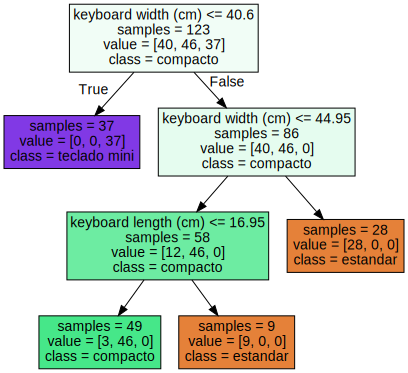

In [ ]:
with open('arbol2.dot') as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)